In [394]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.cancorr import CanCorr

In [356]:
data_folder = "data/processed/"
df_social = pd.read_csv(data_folder + "socio_extrapolated_5_country.csv")
df_energy = pd.read_csv(data_folder + "pcc_energy_extrapolated_5_country.csv")

In [357]:
temp1 = list(df_energy["Entity"].unique())
temp2 = list(df_social["Entity"].unique())
exclude_countries = list(set(temp2) - set(temp1))
df_social = df_social[~df_social['Entity'].isin(exclude_countries)]

In [358]:
df_energy = df_energy.groupby("Entity").mean().reset_index()
df_social = df_social.groupby("Entity").mean().reset_index()

In [359]:
df_energy_sub = df_energy.iloc[:,3:]
df_social_sub = df_social.iloc[:,3:]

In [360]:
E = (df_energy_sub - df_energy_sub.mean())/df_energy_sub.std()
S = (df_social_sub - df_social_sub.mean())/df_social_sub.std()

In [361]:
S = S.fillna(0)
E = E.fillna(0)

In [362]:
S.head()

,Literacy_Rate,Military_Spendings,GDP_Per_Capita,Child_Mortality_Rate,GDP,HDI,Life_Expectancy,Obesity_Rate
0,-2.652409,-0.171599,-0.908458,1.738822,-0.293326,-1.736553,-1.607646,-1.218804
1,0.762728,-0.170139,-0.533959,-0.525469,-0.302662,0.297187,0.721587,0.072038
2,-0.746069,-0.114086,-0.373150,0.363939,-0.106952,0.210871,-0.055885,0.307427
3,0.752017,0.000000,0.000000,0.000000,0.000000,0.000000,0.523360,0.000000
4,-0.596104,-0.138192,-0.709453,1.823230,-0.269781,-0.967307,-1.941356,-1.088006


In [363]:
n_samples = S.shape[0]
n_features = S.shape[1]
n_targets = E.shape[1]
print(n_samples)
print(n_features)
print(n_targets)

211
8
11


In [387]:
ca = CCA(n_components=n_features)
ca.fit(S, E)
S_c, E_c = ca.transform(S, E)

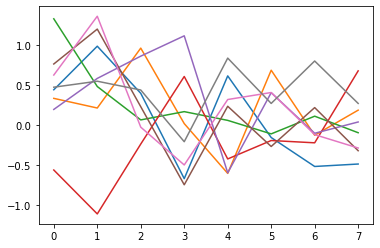

In [388]:
for i in range(n_features):
    plt.plot(ca.x_loadings_[i])


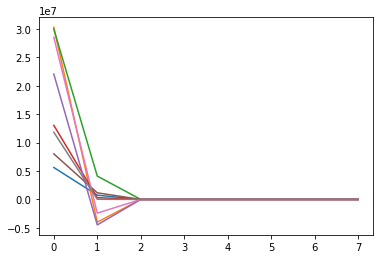

In [389]:
for i in range(n_features):
    plt.plot(ca.y_loadings_[i])

In [390]:
# pairwise canonical correlations 
np.corrcoef(E_c.T, S_c.T).diagonal(offset=n_features)
# we see quite high correlation in the first and second canonical component. let's plot the corresponding loadings 
# to investigate further


array([0.82734954, 0.61189237, 0.25465537, 0.20814926, 0.16491439,
       0.08541058, 0.01434222, 0.01028378])

[ 0.44423366  0.98887869  0.39972542 -0.6671356   0.61763498 -0.15299506
 -0.51489426 -0.48429212]


<BarContainer object of 8 artists>

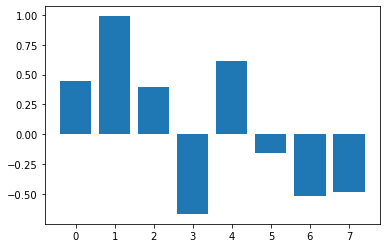

In [391]:
# first component. x and y are plotted seperately due to large size in x
# 1e6 seems extreme. don't know whats wrong 
n = 0
print(ca.x_loadings_[n])
plt.bar(x=np.arange(0,len(ca.x_loadings_[n])), height=ca.x_loadings_[n])

[ 5.61802803e+06  7.48284117e+05  2.55885109e+01 -5.46507477e-01
 -8.00565563e-02 -1.02506118e+00 -1.12514547e-01  4.30334162e-01]


<BarContainer object of 8 artists>

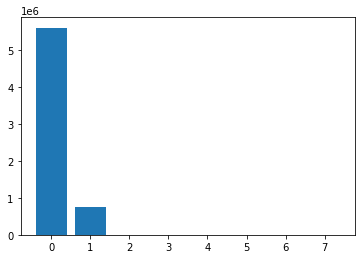

In [392]:
print(ca.y_loadings_[n])
plt.bar(x=np.arange(0,len(ca.y_loadings_[n])), height=ca.y_loadings_[n])

[-3.03562984e+07 -5.44780563e+06  4.28295050e+00 -1.54280992e-01
 -2.15945576e-01  2.68578483e-01 -3.77195479e-01 -8.73466900e-02]


<BarContainer object of 8 artists>

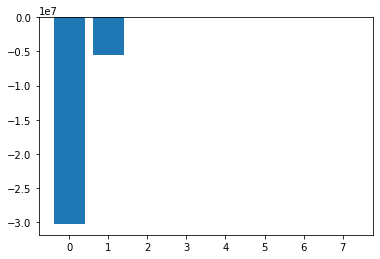

In [370]:
# second component
n = 1
print(ca.x_loadings_[n])
plt.bar(x=np.arange(0,len(ca.x_loadings_[n])), height=ca.x_loadings_[n])

[-0.336413    0.24027033  0.98052    -0.07177308  0.6042939   0.68848395
  0.12368921 -0.18918714]


<BarContainer object of 8 artists>

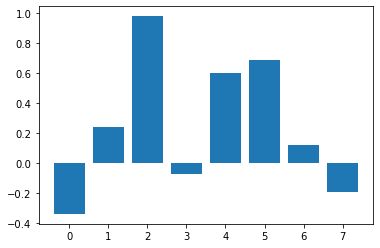

In [371]:
print(ca.y_loadings_[n])
plt.bar(x=np.arange(0,len(ca.y_loadings_[n])), height=ca.y_loadings_[n])

In [372]:
E.columns

Index(['Coal per capita (kWh)', 'Fossil Fuels per capita (kWh)',
       'Energy per capita (kWh)', 'Low-carbon energy per capita (kWh)',
       'Gas per capita (kWh)', 'Nuclear per capita (kWh)',
       'Oil per capita (kWh)', 'Renewables per capita (kWh)',
       'Wind per capita (kWh)', 'Solar per capita (kWh)',
       'Hydro per capita (kWh)'],
      dtype='object')

In [373]:
E.describe()

,Coal per capita (kWh),Fossil Fuels per capita (kWh),Energy per capita (kWh),Low-carbon energy per capita (kWh),Gas per capita (kWh),Nuclear per capita (kWh),Oil per capita (kWh),Renewables per capita (kWh),Wind per capita (kWh),Solar per capita (kWh),Hydro per capita (kWh)
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,1.452235e-16,-4.419845e-17,1.410141e-16,1.341739e-17,-2.157305e-17,3.472736e-17,1.104961e-16,3.604279e-17,4.893400e-17,-3.051798e-17,-8.155667e-18
std,6.094494e-01,6.094494e-01,1.000000e+00,6.094494e-01,6.094494e-01,6.094494e-01,6.094494e-01,6.094494e-01,6.094494e-01,6.094494e-01,6.094494e-01
min,-7.539263e-01,-1.039824e+00,-7.610407e-01,-4.704477e-01,-5.163250e-01,-5.098541e-01,-1.065748e+00,-3.702629e-01,-5.322614e-01,-7.095299e-01,-3.517782e-01
25%,0.000000e+00,-1.453256e-02,-6.562460e-01,-1.513478e-01,-1.184147e-01,-4.731565e-01,0.000000e+00,-2.091313e-01,-2.137349e-01,-1.523820e-02,-1.992487e-01
50%,0.000000e+00,0.000000e+00,-3.658402e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,2.938026e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.324533e+00,5.000612e+00,6.189207e+00,5.259821e+00,6.905125e+00,4.523752e+00,4.748967e+00,5.736283e+00,6.079005e+00,3.851100e+00,5.945571e+00


In [374]:
(df_energy_sub - df_energy_sub.mean())/df_energy_sub.std()

,Coal per capita (kWh),Fossil Fuels per capita (kWh),Energy per capita (kWh),Low-carbon energy per capita (kWh),Gas per capita (kWh),Nuclear per capita (kWh),Oil per capita (kWh),Renewables per capita (kWh),Wind per capita (kWh),Solar per capita (kWh),Hydro per capita (kWh)
0,NaN,NaN,-0.733203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,-0.389777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.731341,-0.752100,-0.448624,-0.467206,-0.226786,-0.509854,-0.835508,-0.366808,-0.531916,-0.649154,-0.348045
3,NaN,NaN,0.572834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.681636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
206,-0.743874,-0.291213,0.141644,-0.078062,0.027129,-0.509854,-0.238859,0.047888,-0.532254,-0.706793,0.108415
207,-0.605182,-0.984805,-0.656762,-0.425503,-0.501085,-0.509854,-1.000860,-0.322367,-0.530044,-0.580451,-0.299582
208,NaN,NaN,-0.652240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,-0.641635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
df_energy

,Entity,Unnamed: 0,Year,Coal per capita (kWh),Fossil Fuels per capita (kWh),Energy per capita (kWh),Low-carbon energy per capita (kWh),Gas per capita (kWh),Nuclear per capita (kWh),Oil per capita (kWh),Renewables per capita (kWh),Wind per capita (kWh),Solar per capita (kWh),Hydro per capita (kWh)
0,Afghanistan,4162.5,1999.5,NaN,NaN,875.858550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,4202.5,1999.5,NaN,NaN,11681.020075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,27.5,1992.5,176.147429,9788.705911,9829.523857,40.825750,5870.029732,0.0,3742.528768,0.040826,0.093196,2.920946,37.811661
3,American Samoa,4242.5,1999.5,NaN,NaN,41967.546400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,4282.5,1999.5,NaN,NaN,2498.295825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Venezuela,4058.5,1992.5,78.401054,23739.436250,28401.050446,4661.636893,11017.847196,0.0,12643.187804,4.661637,0.001893,0.132411,4661.502643
207,Vietnam,4114.5,1992.5,1160.075536,2744.903304,3280.915018,536.014250,308.975357,0.0,1275.852375,0.536014,0.597607,6.244732,528.714732
208,Yemen,9176.5,1999.5,NaN,NaN,3423.173625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,Zambia,9216.5,1999.5,NaN,NaN,3756.863325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

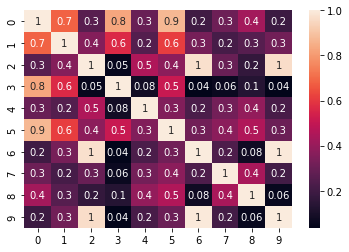

In [376]:
sns.heatmap(np.corrcoef(df_energy.iloc[:,4:].fillna(0).T), annot=True, fmt=".1g")

In [377]:
df_energy.iloc[:,4:].columns

Index(['Fossil Fuels per capita (kWh)', 'Energy per capita (kWh)',
       'Low-carbon energy per capita (kWh)', 'Gas per capita (kWh)',
       'Nuclear per capita (kWh)', 'Oil per capita (kWh)',
       'Renewables per capita (kWh)', 'Wind per capita (kWh)',
       'Solar per capita (kWh)', 'Hydro per capita (kWh)'],
      dtype='object')

In [ ]:
plt.scatter(ca.x_loadings_[b])

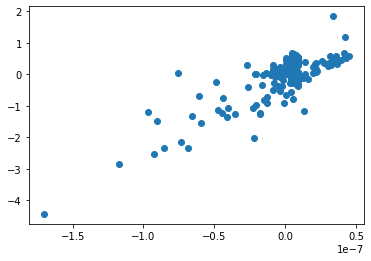

In [384]:
plt.scatter(E_c[:,0], S_c[:,0])

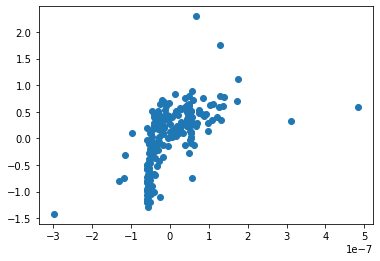

In [385]:
plt.scatter(E_c[:,1], S_c[:,1])

In [396]:
# try with statsmodels instead 
res = CanCorr(E, S)

In [403]:
test =  res.corr_test()

In [410]:
test.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Cancorr results
======================================================================
  Canonical Correlation Wilks' lambda  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------------
0                0.8293        0.1602 88.0000 1248.8154  4.5718 0.0000
1                0.6157        0.5130 70.0000 1114.6975  1.9313 0.0000
2                0.2834        0.8262 54.0000  978.5068  0.6911 0.9563
3                0.2479        0.8984 40.0000  839.7031  0.5225 0.9939
4                0.1691        0.9572 28.0000  697.2936  0.3037 0.9998
5                0.1003        0.9854 18.0000  549.2001  0.1589 1.0000
6                0.0661        0.9954 10.0000  390.0000  0.0895 0.9999
7                0.0144        0.9998  4.0000  196.0000  0.0102 0.9998
----------------------------------------------------------------------
                                                                      
----------------------------------------------------------------------
Multivariate Statistics and F Approximations                          
------------------------------------------------------------------------
                         Value     Num DF     Den DF    F Value   Pr > F
------------------------------------------------------------------------
Wilks' lambda            0.1602   88.0000   1268.4877    4.6438   0.0000
Pillai's trace           1.2518   88.0000   1592.0000    3.3560   0.0000
Hotelling-Lawley trace   3.0097   88.0000    834.7763    6.5138   0.0000
Roy's greatest root      2.2021   11.0000    199.0000   39.8378   0.0000
======================================================================

"""

In [417]:
res.y_cancoef
# same problem with very high values as for the sklearn solution 

array([[-4.82542009e+04,  2.90321676e+05, -3.06785472e+06,
        -2.97390095e+06, -3.60251712e+04, -2.50490485e+06,
         4.26371788e+06,  2.96748000e+06],
       [ 1.87279412e+05, -1.12676748e+06,  1.19066526e+07,
         1.15420081e+07,  1.39817393e+05,  9.72178707e+06,
        -1.65479170e+07, -1.15170881e+07],
       [ 2.96778599e-02, -7.44537236e-02, -7.23952748e-03,
        -1.17017914e-02,  3.19486524e-02,  1.33454104e-02,
        -7.01801007e-03, -1.09252791e-03],
       [-2.91872706e+06,  4.25783225e+06,  2.15800598e+06,
        -1.17913628e+07,  9.65636899e+06, -1.45524078e+07,
        -3.50912963e+07,  2.51325225e+07],
       [-1.25435736e+05,  7.54685005e+05, -7.97482288e+06,
        -7.73059171e+06, -9.36466667e+04, -6.51144641e+06,
         1.10834433e+07,  7.71390092e+06],
       [ 7.04128777e+05, -1.02718141e+06, -5.20608444e+05,
         2.84460917e+06, -2.32955229e+06,  3.51069794e+06,
         8.46560536e+06, -6.06309928e+06],
       [-9.22977443e+04,  5.553101

In [418]:
res.x_cancoef

array([[ 0.0037121 ,  0.01726606,  0.05066436,  0.00893953,  0.06771578,
        -0.03906677,  0.11052893, -0.00304539],
       [ 0.02865076,  0.04868752,  0.04238536, -0.12485755, -0.03833324,
         0.07093466,  0.01732023, -0.0179703 ],
       [ 0.09703245,  0.05745229, -0.0162078 ,  0.0498339 ,  0.01266417,
         0.00707511,  0.02284155,  0.02115765],
       [-0.00232139, -0.06336039, -0.0134714 , -0.01352123, -0.00094294,
        -0.08131871,  0.09057679, -0.19730963],
       [-0.03240037, -0.06218727,  0.020471  ,  0.14173275, -0.0025778 ,
        -0.04222597, -0.00993827,  0.00961535],
       [-0.02582425, -0.08795562,  0.0160177 , -0.0930954 , -0.08282771,
        -0.15914876, -0.06562108, -0.07357351],
       [-0.00381841, -0.07694786, -0.07716397,  0.00020835, -0.00130209,
         0.09479455,  0.05340029, -0.07587967],
       [-0.00427132, -0.00153193,  0.0245836 ,  0.01962866,  0.05996624,
         0.0140704 , -0.03961914, -0.05180522]])

AttributeError: 'CanCorr' object has no attribute 'plot_loadings'